In [659]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [329]:
data = pd.read_csv('./한국자산관리공사_국유부동산 매각현황_20221231.csv',encoding ='cp949')

### 결측치 확인

In [187]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [188]:
data.count()

연도구분          141317
지역구분          141317
소재지명          141317
재산구분          141317
공부지목          141316
대장면적(제곱미터)    141317
대장금액(원)       141317
처분구분명         141317
계약일자          141317
부점명           141317
팀명            141232
dtype: int64

* '공부지목' 컬럼에 1개, '팀명' 컬럼에 85개의 결측치가 있는 것을 확인

In [193]:
nodata = data.isnull() == True

In [316]:
count = 0

for i in nodata.index:
    for j in nodata.columns:
        if nodata.loc[i,j] == True:
            count += 1
            
print(f' 데이터 안에 {count} 개의 결측치가 있습니다. ')  

 데이터 안에 86 개의 결측치가 있습니다. 


In [330]:
data.dropna(axis = 0,inplace = True)

* 총 141317 개의 데이터 중에서 한 개의 데이터에 결측치가 하나만 있다고 가정했을 때, 최대 86개의 데이터가 결측치이기 때문에 결측값들을 제거하고 141231개의 데이터로 분석을 진행하겠다

In [190]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


# [ 필수 분석 ] 1. 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [4]:
data['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [5]:
team_money = data.groupby('팀명').sum()

C:\Users\icn97\AppData\Local\Temp\ipykernel_8548\2505019158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_money = data.groupby('팀명').sum()


In [6]:
team_money

,연도구분,대장면적(제곱미터),대장금액(원)
팀명,,,
국유 안동팀,2421728,824662.000,9.439484e+09
국유 충주팀,4087741,2153910.000,3.596089e+10
국유 포항팀,2713963,617655.000,4.386039e+10
국유1팀,1559236,394219.281,1.211469e+10
국유2팀,2934448,2374227.200,2.341540e+10
...,...,...,...
팀미정,562559,521700.000,6.866215e+09
평택지사,4774545,481344.809,6.073721e+10
포항지부,3197059,646285.000,2.784812e+10


In [153]:
for i in team_money.T:
    if team_money.loc[i,'대장금액(원)'] == team_money['대장금액(원)'].max():
            team_max = [i,format(team_money.loc[i,'대장금액(원)'],',')]
            print( i,team_money.loc[i,'대장금액(원)'] )
    elif team_money.loc[i,'대장금액(원)'] == team_money['대장금액(원)'].min():
            team_min = [i , format(team_money.loc[i,'대장금액(원)'],',')]
            print(i , team_money.loc[i,'대장금액(원)'])

국유재산3팀 1581917203990.0
해안면무주지국유화지원추진단 22101960.0


In [154]:
gap =format(team_money.loc['국유재산3팀','대장금액(원)'] - team_money.loc['해안면무주지국유화지원추진단','대장금액(원)'] ,',')

In [155]:
gap

'1,581,895,102,030.0'

In [156]:
print(f'매각 금액이 가장 많은 팀은 {team_max[0]} 으로 {team_max[1]} 원 이고, 매각 금액이 가장 낮은 팀은 {team_min[0]} 으로 {team_min[1]} 원 이기 때문에 상위 팀과 하위 팀의 차이는 {gap} (원) 입니다.')

매각 금액이 가장 많은 팀은 국유재산3팀 으로 1,581,917,203,990.0 원 이고, 매각 금액이 가장 낮은 팀은 해안면무주지국유화지원추진단 으로 22,101,960.0 원 이기 때문에 상위 팀과 하위 팀의 차이는 1,581,895,102,030.0 (원) 입니다.


# [ 필수 분석 ] 2. 연도별 매각금액 추이 확인하기

In [162]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [163]:
year_money = data.groupby('연도구분').sum()

C:\Users\icn97\AppData\Local\Temp\ipykernel_8548\3792690149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_money = data.groupby('연도구분').sum()


In [164]:
year_money

,대장면적(제곱미터),대장금액(원)
연도구분,,
2014,1.172968e+07,8.368028e+11
2015,1.163821e+07,1.395759e+12
2016,1.573270e+07,5.790835e+11
2017,8.878092e+06,7.006585e+11
2018,5.180831e+06,6.132238e+11
2019,1.308799e+07,7.710394e+11
2020,5.210620e+06,7.466810e+11
2021,4.588363e+06,1.477228e+12
2022,4.310773e+06,1.443302e+12


In [166]:
year_money['연도'] = [i for i in year_money.index]

In [652]:
year_money

,대장면적(제곱미터),대장금액(원),연도
연도구분,,,
2014,1.172968e+07,8.368028e+11,2014
2015,1.163821e+07,1.395759e+12,2015
2016,1.573270e+07,5.790835e+11,2016
2017,8.878092e+06,7.006585e+11,2017
2018,5.180831e+06,6.132238e+11,2018
2019,1.308799e+07,7.710394e+11,2019
2020,5.210620e+06,7.466810e+11,2020
2021,4.588363e+06,1.477228e+12,2021
2022,4.310773e+06,1.443302e+12,2022


In [653]:
x = year_money['대장금액(원)']

In [655]:
print(x)

연도구분
2014    8.368028e+11
2015    1.395759e+12
2016    5.790835e+11
2017    7.006585e+11
2018    6.132238e+11
2019    7.710394e+11
2020    7.466810e+11
2021    1.477228e+12
2022    1.443302e+12
Name: 대장금액(원), dtype: float64


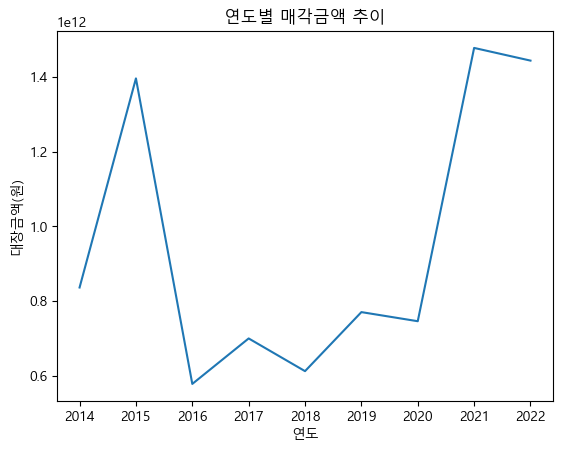

In [656]:
plt.rc('font', family='Malgun Gothic')
sns.lineplot(data = year_money, x = '연도', y = '대장금액(원)')
plt.xlabel('연도')
plt.ylabel('대장금액(원)')
plt.title('연도별 매각금액 추이')
plt.show()

In [293]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# [ 필수 분석 ] 3. 상위 5개 지역별 매각 면적 확인하기

In [585]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [586]:
data['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [587]:
local = data.groupby('지역구분').sum()

C:\Users\icn97\AppData\Local\Temp\ipykernel_8548\1374967772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local = data.groupby('지역구분').sum()


In [588]:
local

,연도구분,대장면적(제곱미터),대장금액(원)
지역구분,,,
강원도,24328138,1.335528e+07,2.649139e+11
경기도,54863891,1.119931e+07,1.990696e+12
경상남도,30569883,6.277679e+06,3.321245e+11
경상북도,27547882,7.053823e+06,2.485289e+11
광주광역시,4518553,1.416930e+06,2.625189e+11
대구광역시,6238950,6.432068e+05,2.345000e+11
대전광역시,2640230,3.968756e+05,1.256069e+11
부산광역시,21693661,3.048544e+06,5.214296e+11
서울특별시,13485369,3.206044e+06,2.915165e+12


In [589]:
local['순위'] = local['대장면적(제곱미터)'].rank(ascending=False)

In [590]:
local

,연도구분,대장면적(제곱미터),대장금액(원),순위
지역구분,,,,
강원도,24328138,1.335528e+07,2.649139e+11,1.0
경기도,54863891,1.119931e+07,1.990696e+12,2.0
경상남도,30569883,6.277679e+06,3.321245e+11,7.0
경상북도,27547882,7.053823e+06,2.485289e+11,5.0
광주광역시,4518553,1.416930e+06,2.625189e+11,12.0
대구광역시,6238950,6.432068e+05,2.345000e+11,15.0
대전광역시,2640230,3.968756e+05,1.256069e+11,16.0
부산광역시,21693661,3.048544e+06,5.214296e+11,10.0
서울특별시,13485369,3.206044e+06,2.915165e+12,9.0


In [592]:
for i in local.T:
    if local.loc[i,'순위'] == 1.0:
        local1 = i,local.loc[i,'대장면적(제곱미터)']
        print(i,local.loc[i,'대장면적(제곱미터)'])
    elif local.loc[i,'순위'] == 2.0:
        local2 = i,local.loc[i,'대장면적(제곱미터)']
        print(i,local.loc[i,'대장면적(제곱미터)'])
    elif local.loc[i,'순위'] == 3.0:
        local3 = i,local.loc[i,'대장면적(제곱미터)']
        print(i,local.loc[i,'대장면적(제곱미터)'])
    elif local.loc[i,'순위'] == 4.0:
        local4 = i,local.loc[i,'대장면적(제곱미터)']
        print(i,local.loc[i,'대장면적(제곱미터)'])
    elif local.loc[i,'순위'] == 5.0:
        local5 = i,local.loc[i,'대장면적(제곱미터)']
        print(i,local.loc[i,'대장면적(제곱미터)'])

강원도 13355279.95
경기도 11199309.48
경상북도 7053822.672
전라남도 9388420.737
충청남도 8580609.586


In [593]:
print(f'지역별 매각 면적 중 상위 5개는 순서대로 \n {local1}㎡ , \n {local2}㎡ , \n {local3}㎡ , \n {local4}㎡ , \n {local5}㎡ \n입니다. ')

지역별 매각 면적 중 상위 5개는 순서대로 
 ('강원도', 13355279.95)㎡ , 
 ('경기도', 11199309.48)㎡ , 
 ('전라남도', 9388420.737)㎡ , 
 ('충청남도', 8580609.586)㎡ , 
 ('경상북도', 7053822.672)㎡ 
입니다. 


# [ 필수 분석 ] 4. 계약일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

In [244]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [54]:
data['계약일자'].unique()

array(['2014-01-01', '2014-01-02', '2014-01-03', ..., '2022-04-09',
       '2022-10-08', '2022-01-23'], dtype=object)

In [337]:
data_day = data['계약일자'].value_counts()

In [351]:
data_day

2017-12-01    600
2016-11-30    504
2022-07-25    486
2020-04-01    442
2019-08-29    432
             ... 
2021-03-28      1
2017-02-05      1
2017-02-18      1
2017-04-16      1
2022-01-23      1
Name: 계약일자, Length: 2784, dtype: int64

In [657]:
day_27 = data_day.nlargest(27)

In [658]:
day_27

2017-12-01    600
2016-11-30    504
2022-07-25    486
2020-04-01    442
2019-08-29    432
2017-10-27    415
2019-02-26    377
2019-01-21    347
2016-11-10    342
2016-09-01    342
2014-01-20    340
2018-07-11    307
2017-04-21    306
2022-12-21    293
2019-06-26    292
2022-10-07    291
2021-07-30    290
2014-10-31    270
2017-12-13    264
2019-11-22    263
2017-06-22    260
2020-05-27    256
2019-12-31    254
2022-12-16    254
2015-08-31    252
2022-06-30    249
2017-12-28    249
Name: 계약일자, dtype: int64

# [ 선택 분석 ] 1. 처분 구분별 비율 확인하기

In [331]:
data

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [332]:
data['처분구분명'].unique()

array(['처분(매각수의)', '처분(무상관리전환)', '처분(매각입찰)', '처분(유상관리전환)', '처분(무상양여)',
       '처분(유상양여)', '처분(사용승인)', '처분(무상귀속)'], dtype=object)

In [320]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0

for i in data['처분구분명']:
    if i == '처분(매각수의)':
        a += 1
    elif i == '처분(무상관리전환)':
        b += 1
    elif i == '처분(매각입찰)':
        c += 1
    elif i == '처분(유상관리전환)':
        d += 1
    elif i == '처분(무상양여)':
        e += 1
    elif i == '처분(유상양여)':
        f += 1
    elif i == '처분(사용승인)':
        g += 1
    elif i == '처분(무상귀속)':
        h += 1
        
        
print(a , b , c , d , e , f , g , h)

124517 4289 8832 114 686 1 2086 706


In [321]:
for i in [a,b,c,d,e,f,g,h]:
    print(round(i/len(data)*100,4),'%')

88.1655 %
3.0369 %
6.2536 %
0.0807 %
0.4857 %
0.0007 %
1.477 %
0.4999 %


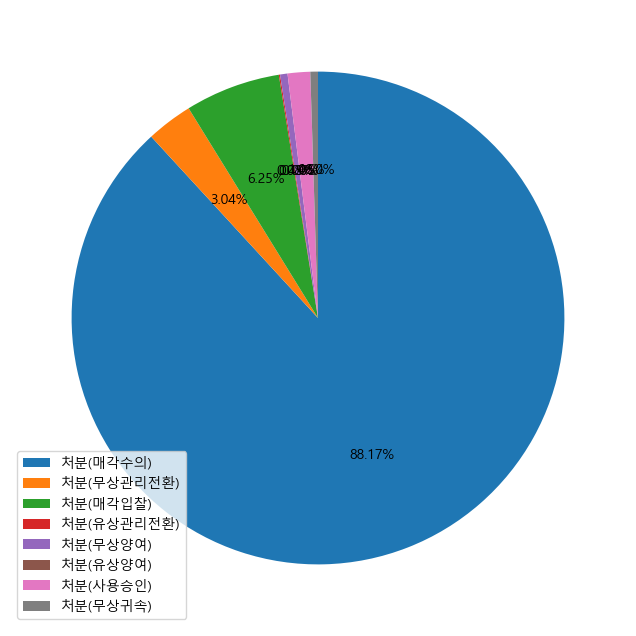

In [324]:
labels = ['처분(매각수의)', '처분(무상관리전환)', '처분(매각입찰)', '처분(유상관리전환)', '처분(무상양여)','처분(유상양여)', '처분(사용승인)', '처분(무상귀속)'] ## 라벨
frequency = [124517, 4289, 8832, 114, 686, 1, 2086, 706] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력 ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
plt.legend(pie[0],labels)

# [ 선택 분석 ] 2. 필수-3 항목을 지역 규모에 따라 보정하기

In [571]:
city = pd.read_csv('./도시지역면적_시도_시_군_구__20230712155952.csv',encoding = 'cp949')

In [572]:
city.rename(columns = {'2021':'면적'}, inplace = True)
city.rename(columns = {'소재지(시군구)별':'지역'}, inplace = True)
city.drop([0],inplace = True)
city = city.sort_values(by=city.columns[0],ascending = True)
city.reset_index(inplace = True)
city.drop(['index'],axis=1,inplace = True)

In [574]:
city.loc[0,'지역'] = '강원도'

In [575]:
city

,지역,면적
0,강원도,1030004376
1,경기도,3385441488
2,경상남도,2007710621
3,경상북도,1879078335
4,광주광역시,479978979
5,대구광역시,799509757
6,대전광역시,496123890
7,부산광역시,940825971
8,서울특별시,605680264
9,세종특별자치시,143324836


In [594]:
data2 = data.copy()
data2 = data2[['지역구분','대장면적(제곱미터)']]

In [610]:
local = data2.groupby('지역구분').sum()
local['지역구분'] = local.index
local.rename(columns = {'지역구분':'지역'},inplace = True)

In [611]:
local.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object', name='지역구분')

In [612]:
local.reset_index(inplace = True)

In [613]:
local.drop(['지역구분'],axis=1,inplace = True)

In [614]:
local

,대장면적(제곱미터),지역
0,1.335528e+07,강원도
1,1.119931e+07,경기도
2,6.277679e+06,경상남도
3,7.053823e+06,경상북도
4,1.416930e+06,광주광역시
5,6.432068e+05,대구광역시
6,3.968756e+05,대전광역시
7,3.048544e+06,부산광역시
8,3.206044e+06,서울특별시
9,2.834273e+05,세종특별자치시


In [615]:
city

,지역,면적
0,강원도,1030004376
1,경기도,3385441488
2,경상남도,2007710621
3,경상북도,1879078335
4,광주광역시,479978979
5,대구광역시,799509757
6,대전광역시,496123890
7,부산광역시,940825971
8,서울특별시,605680264
9,세종특별자치시,143324836


In [629]:
list1 = []

for i in local.index:
    for j in local.index:
        if i == j:
            print((local.loc[i,'대장면적(제곱미터)']/city.loc[j,'면적'])*100) 

1.2966236125971566
0.33080794690137033
0.3126784587548387
0.37538736627496694
0.29520669612491507
0.08045014540078965
0.07999525582208912
0.3240285140895627
0.5293294648279971
0.19775170020079422
0.09973175294801875
0.33879245980929495
0.5457041726671938
0.7587781667738379
0.2210389704622982
0.9407841884981626
0.704392136288797


In [632]:
local['비율'] = [1.2966236125971566,
0.33080794690137033,
0.3126784587548387,
0.37538736627496694,
0.29520669612491507,
0.08045014540078965,
0.07999525582208912,
0.3240285140895627,
0.5293294648279971,
0.19775170020079422,
0.09973175294801875,
0.33879245980929495,
0.5457041726671938,
0.7587781667738379,
0.2210389704622982,
0.9407841884981626,
0.704392136288797]

In [635]:
local['순위'] = local['비율'].rank(ascending=False)

In [647]:
local

,대장면적(제곱미터),비율,순위
지역,,,
강원도,1.335528e+07,1.296624,1.0
경기도,1.119931e+07,0.330808,9.0
경상남도,6.277679e+06,0.312678,11.0
경상북도,7.053823e+06,0.375387,7.0
광주광역시,1.416930e+06,0.295207,12.0
대구광역시,6.432068e+05,0.080450,16.0
대전광역시,3.968756e+05,0.079995,17.0
부산광역시,3.048544e+06,0.324029,10.0
서울특별시,3.206044e+06,0.529329,6.0


In [646]:
list1 = local['지역']
local.index = list1
local.drop(['지역'],axis=1,inplace = True)

In [648]:
for i in local.T:
    if local.loc[i,'순위'] == 1.0:
        local1 = i,local.loc[i,'비율']
        print(i,local.loc[i,'비율'])
    elif local.loc[i,'순위'] == 2.0:
        local2 = i,local.loc[i,'비율']
        print(i,local.loc[i,'비율'])
    elif local.loc[i,'순위'] == 3.0:
        local3 = i,local.loc[i,'비율']
        print(i,local.loc[i,'비율'])
    elif local.loc[i,'순위'] == 4.0:
        local4 = i,local.loc[i,'비율']
        print(i,local.loc[i,'비율'])
    elif local.loc[i,'순위'] == 5.0:
        local5 = i,local.loc[i,'비율']
        print(i,local.loc[i,'비율'])

강원도 1.2966236125971566
전라남도 0.5457041726671938
전라북도 0.7587781667738379
충청남도 0.9407841884981626
충청북도 0.704392136288797


In [650]:
print(f'지역별 지역 규모에 따른 매각 면적 중 상위 5개는 순서대로 \n {local1}% , \n {local2}% , \n {local3}% , \n {local4}% , \n {local5}% \n입니다. ')

지역별 지역 규모에 따른 매각 면적 중 상위 5개는 순서대로 
 ('강원도', 1.2966236125971566)% , 
 ('충청남도', 0.9407841884981626)% , 
 ('전라북도', 0.7587781667738379)% , 
 ('충청북도', 0.704392136288797)% , 
 ('전라남도', 0.5457041726671938)% 
입니다. 
